# PyTorch Workflow

Let's explor an example PyTorch end-to-end workflow
https://www.learnpytorch.io/01_pytorch_workflow/

In [86]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making prediction and evaluteing a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluteing a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [87]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything in ML
* Excel spreadsheet
* Images
* Videos
* DNA
* Text
* Audio

ML is a game of 2 parts:
1. Get data into numerical representaion.
2. Build a model to learn patterns in that numerical represenation

To showcase this, we'll use linear regression. Formula to make a straight line with *known* **parameters**

In [88]:
# Create *known* parameters
weight = 0.7 # slope
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data training and test sets (important step)



In [89]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [90]:
#Visulaize the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot teste data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

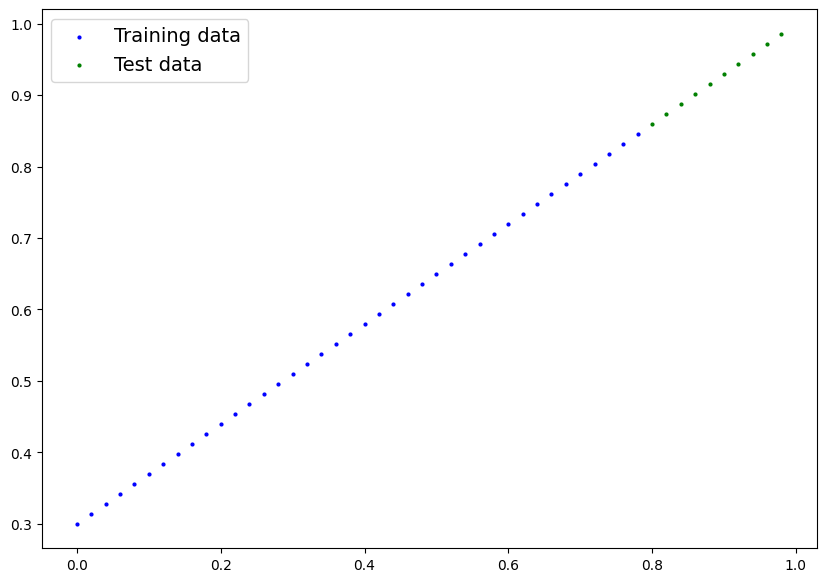

In [91]:
plot_predictions()

## 2. Building model

Our first PyTorch model

What out model does:
* Start with random values (weight & bias)
* Look at the training data and adjust values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How it does it:
1. Gradient descent
2. Backpropagation

In [92]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):  # <-almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,            # start w/ a random weight and try to adjust to the ideal weight
                                            requires_grad=True,  # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float))  # <- PyTorch loves datatype float32
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (another word for neural network, a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this is where optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to override forward(), this methord defines what happens in the forward computation
https://pytorch.org/tutorials/beginner/ptcheat.html?highlight=cheat

### Checking the contents of our our PyTorch model

Let's see what's inside. Let's check out model parameters or what's inside using `.parameters()`

In [93]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass oof nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [94]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [95]:
weight, bias

(0.7, 0.3)

### Making predictions torch.inference_mode()

To check our model predictive power, let's see how well it predicts `y_test` based on `X_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [96]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [97]:
# Make predictions w/ model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

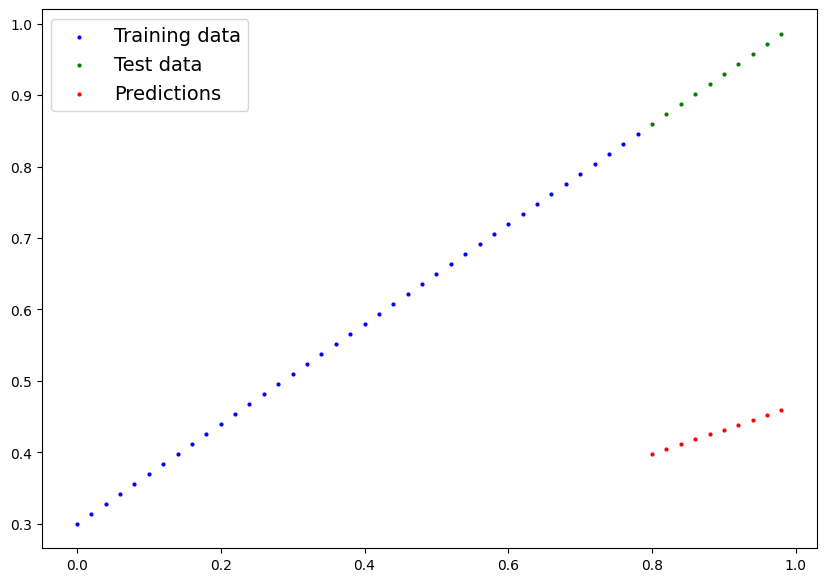

In [98]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training for a model to move some *unknown* parameters (these may be random) to some *known* parameters.
A poor representation of the data to a better representation of the data

One way to measure how wrong (poor) your models predictions are is to use a loss function
* Note: Loss function may also be called cost function or criterion in different areas. For our case we'll refer to it as a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
https://pytorch.org/docs/stable/nn.html#loss-functions

* **Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.
https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [99]:
# Check out our model's parameters (a parameter is a value thaht the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [100]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # lr = learning rate - possibly the most important hyperparamter you can set

**Q:** Which loss function and optimizer should I use?

**A:** This will be problematic. It comes with experience.

For example for a regression problem, a loss function of `nn.L1Loss()` and an optimizer `torch.optim.SGD()` will suffice
But for classification problem like classifiying wheteher a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop and testing loop  in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with the respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [101]:
torch.manual_seed(42)
# An epoch is one loop though the data, this is a hyperparameter because we set it ourselves
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop thtough the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass on train data using forward() mmethod inside
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)  # input first, target second

  # 3. Zero the gradients of th eoptimizer (they accumulate by default)
  optimizer.zero_grad() #

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop

  ### Testing
  model_0.eval() # turns off gradient tracking (dropout/batch norm layers)
  with torch.inference_mode():
    # 1. Do the Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}")
    # Print out the mode state_dict()
    print(model_0.state_dict())

Epoch: 0 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train loss: 0.1976713240146637 | MAE Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train loss: 0.08908725529909134 | MAE Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train loss: 0.053148526698350906 | MAE Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train loss: 0.04543796554207802 | MAE Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train loss: 0.04167863354086876 | MAE Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train loss: 0.03818932920694351 | MAE 

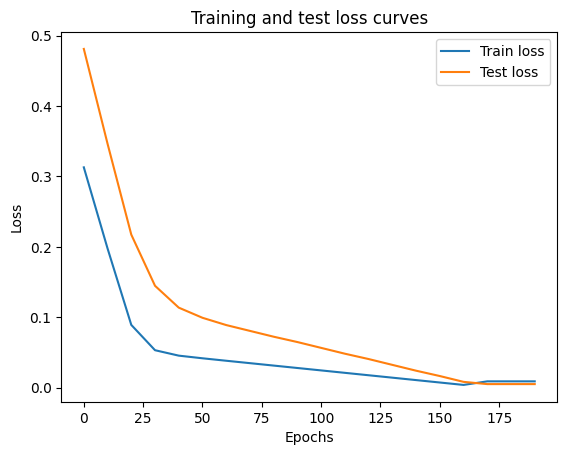

In [102]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [103]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [104]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

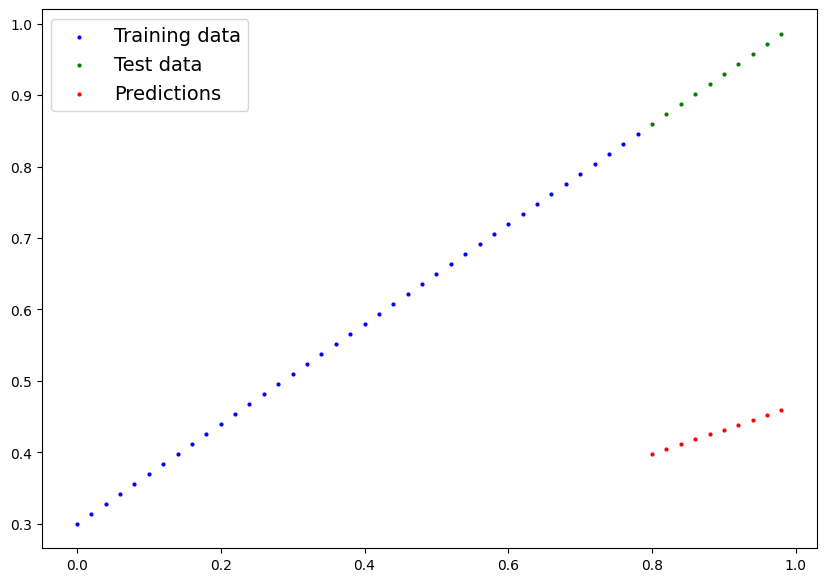

In [105]:
plot_predictions(predictions=y_preds)

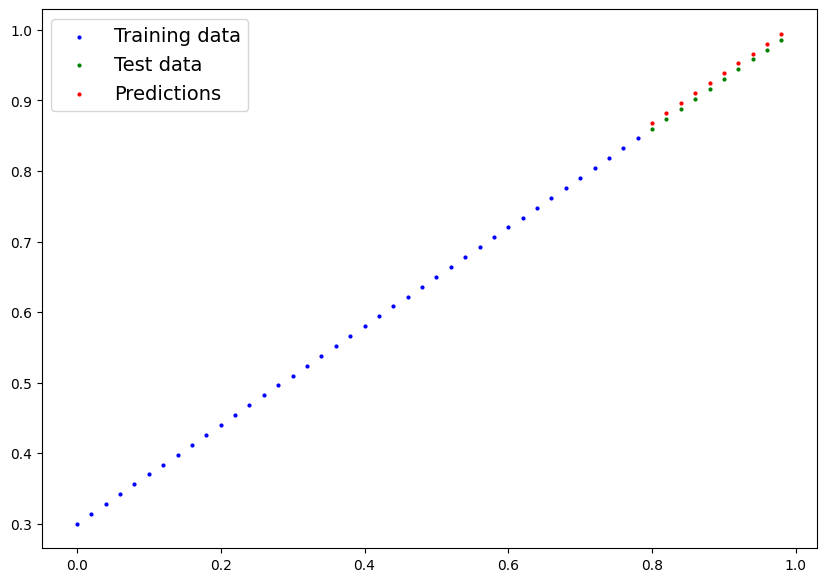

In [106]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are 3 main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch obj in Python's pickle format
2. `torch.load()` - allows to load a saved PyTorch onject
3. `torch.nn.Module.load_state_dict` - this allows to load a model's saved state dictionary
https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [107]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [108]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 Jul 30 22:32 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1271 Jul 30 22:03 01_pytorch_workflow_model_1.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load saved `state_dict()` into that.

In [109]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [110]:
# To load in saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will udpdate the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [111]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [112]:
from torch.autograd.grad_mode import inference_mode
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [113]:
# Compare loaded model preds w/ original model predicitions
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together

Let's go back above through the steps above and see it all in one place

In [114]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device-agnostic code.
'This means if we've got access to a GPU, out code will use it (for potentially faster computing). If not GPU is available, the code will default to using CPU

In [115]:
# Setup device agnostic-code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [116]:
# create some data using linear regression formula y = weight * X + bias
weight = 0.3
bias = 0.9

# Create a range values
start = 0
end = 1
step = 0.01

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]),
 100,
 100)

In [136]:
# Split the data in train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

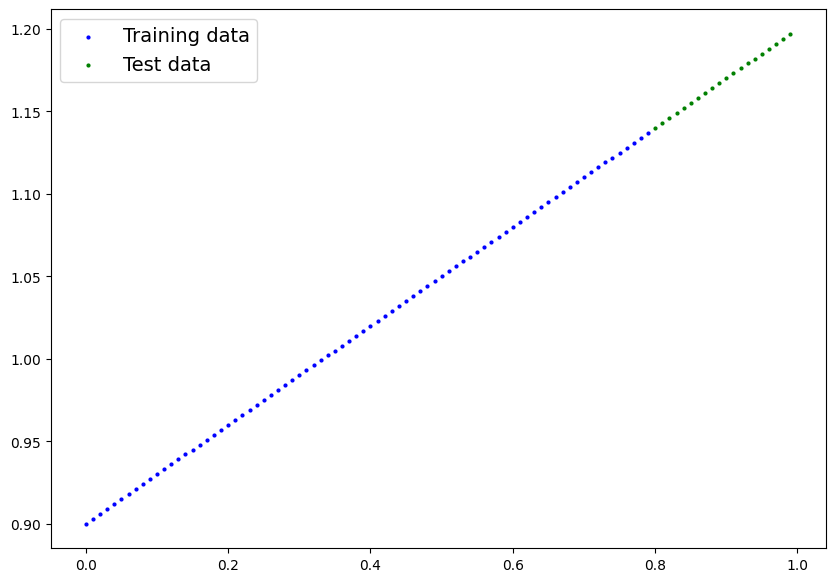

In [141]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model

In [119]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [120]:
# Check the current model device
next(model_1.parameters()).device

device(type='cpu')

In [121]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need :
* Loss function
* Optimizer
* Training loop
* Testing loop

In [122]:
# Setup loss function
loss_fn = nn.L1Loss()  # same as MAE

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [123]:
# Let's write Training loop
torch.manual_seed(42)

epochs = 300

# Put the data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero the Optimizer
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the Optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_1(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")


Epoch: 0 | Train loss: 0.128 | Test loss: 0.337
Epoch: 20 | Train loss: 0.082 | Test loss: 0.218
Epoch: 40 | Train loss: 0.072 | Test loss: 0.175
Epoch: 60 | Train loss: 0.065 | Test loss: 0.153
Epoch: 80 | Train loss: 0.058 | Test loss: 0.137
Epoch: 100 | Train loss: 0.051 | Test loss: 0.121
Epoch: 120 | Train loss: 0.045 | Test loss: 0.104
Epoch: 140 | Train loss: 0.038 | Test loss: 0.088
Epoch: 160 | Train loss: 0.031 | Test loss: 0.072
Epoch: 180 | Train loss: 0.024 | Test loss: 0.056
Epoch: 200 | Train loss: 0.017 | Test loss: 0.040
Epoch: 220 | Train loss: 0.010 | Test loss: 0.024
Epoch: 240 | Train loss: 0.003 | Test loss: 0.007
Epoch: 260 | Train loss: 0.008 | Test loss: 0.007
Epoch: 280 | Train loss: 0.008 | Test loss: 0.007


In [129]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])

In [130]:
weight, bias

(0.3, 0.9)

In [131]:
# Turn model into evaluation mode
model_1.eval()

# Make predicitions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

In [132]:
len(X_test), len(y_preds.cpu())

(20, 20)

In [ ]:
X_train = np.arange(0, len(X_train), 1)

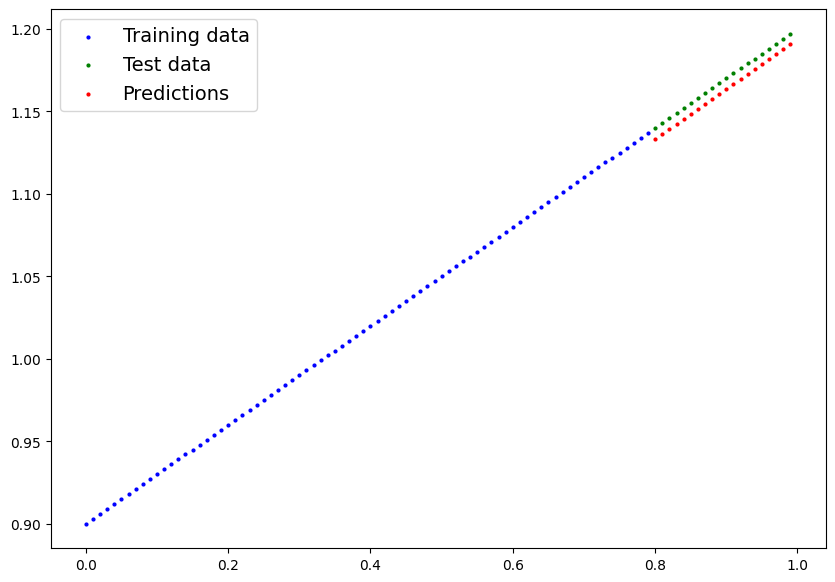

In [142]:
# Check out the model predictions visually
plot_predictions(X_train, y_train, X_test, y_test,predictions = y_preds.cpu())

### 6.4 Saving and loading a trained model

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Load a PyTorch model

# create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

In [ ]:
next(loaded_model_1.parameters()).device

In [ ]:
loaded_model_1.state_dict()

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds